In [1]:
import pickle
with open('AmazonMusic_dataset_scaled.pkl', 'rb') as file:
    dataset = pickle.load(file)

dataset.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.212859,-1.732714,-1.341306,-0.174630,1.861715,-0.315507,1.546579,0.251632,0.461200,-0.954017
1,-1.131650,-1.750687,-1.778656,0.135215,1.848893,-0.362718,-0.390420,-0.651159,-1.502171,0.124611
2,-0.564161,-1.633862,-1.816229,-0.017747,1.868126,-0.362718,2.461000,-0.448740,-1.790267,-0.139301
3,0.550548,-0.461113,-0.972612,2.057044,1.855304,-0.362718,0.504336,0.543116,0.342130,-0.945216
4,0.374897,-1.220479,-1.354551,1.527561,1.855304,-0.362718,2.018538,1.020827,-1.592345,-0.840159


In [2]:
dataset.shape

(54328, 10)

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
k_range = range(1,11)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(dataset)
    sse.append(km.inertia_)

sse

[543280.0000000017,
 443524.03480513196,
 408632.4537727572,
 376528.55037010805,
 352509.16714029154,
 319601.2879903872,
 301972.3412866368,
 289112.4206806514,
 281581.33787055465,
 272633.66793883045]

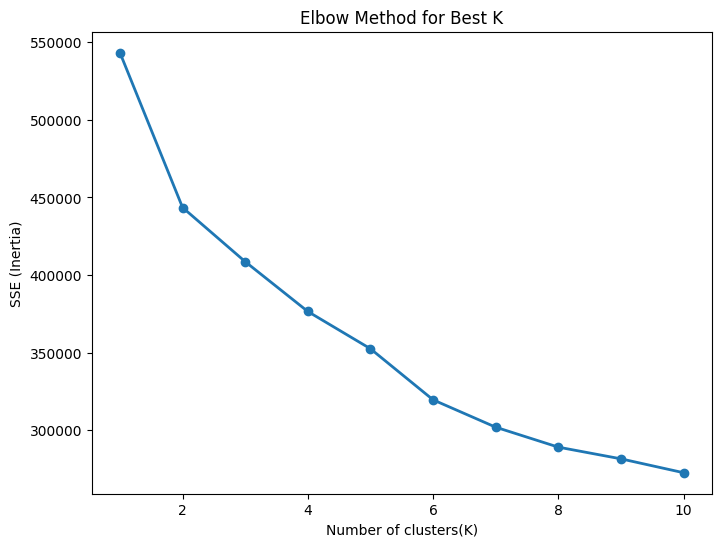

In [4]:
plt.figure(figsize=(8,6))
plt.plot(k_range, sse, 'o-',linewidth=2)
plt.xlabel('Number of clusters(K)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Best K')
plt.show()

In [5]:
## Use sample for finding Silhouette Score
import numpy as np
sample_index = np.random.choice(dataset.shape[0], 5000, replace=False)
sample_data = dataset.iloc[sample_index]
sample_data.shape

(5000, 10)

In [6]:
for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(sample_data)
    score = silhouette_score(sample_data, km.labels_)
    print(f"K : {k}  |  Silhouette_score : {score:.4f}")

K : 2  |  Silhouette_score : 0.1824
K : 3  |  Silhouette_score : 0.1279
K : 4  |  Silhouette_score : 0.1275
K : 5  |  Silhouette_score : 0.1213
K : 6  |  Silhouette_score : 0.1298
K : 7  |  Silhouette_score : 0.1237
K : 8  |  Silhouette_score : 0.1403
K : 9  |  Silhouette_score : 0.1360
K : 10  |  Silhouette_score : 0.1233


### Interpretation
##### Silhouette score tells us how well each point fits into its cluster where higher score is better.
##### The highest score is at K = 2 (0.1824)

In [7]:
best_k = 2
km = KMeans(n_clusters=best_k, random_state=42)
labels = km.fit_predict(dataset)
dataset['Labels'] = labels
dataset

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Labels
0,-0.212859,-1.732714,-1.341306,-0.174630,1.861715,-0.315507,1.546579,0.251632,0.461200,-0.954017,0
1,-1.131650,-1.750687,-1.778656,0.135215,1.848893,-0.362718,-0.390420,-0.651159,-1.502171,0.124611,0
2,-0.564161,-1.633862,-1.816229,-0.017747,1.868126,-0.362718,2.461000,-0.448740,-1.790267,-0.139301,0
3,0.550548,-0.461113,-0.972612,2.057044,1.855304,-0.362718,0.504336,0.543116,0.342130,-0.945216,0
4,0.374897,-1.220479,-1.354551,1.527561,1.855304,-0.362718,2.018538,1.020827,-1.592345,-0.840159,0
...,...,...,...,...,...,...,...,...,...,...,...
54323,0.320850,0.361159,0.659750,-0.107955,-0.343688,-0.362718,1.428589,-0.922402,1.861785,0.923133,1
54324,-0.125033,-0.470100,0.784900,-0.666854,0.441666,-0.362718,-0.429750,-0.930498,-1.376165,1.044767,0
54325,0.537036,-0.007291,0.659209,-0.378580,-0.949533,-0.362718,-0.026618,0.194955,1.647905,-0.721413,1
54326,-0.449313,0.464504,1.393623,-0.562918,-0.862984,-0.362718,-0.676545,-1.193644,0.352589,0.862204,1


In [8]:
dataset['Labels'].value_counts()

Labels
1    32249
0    22079
Name: count, dtype: int64

In [9]:
km.cluster_centers_

array([[-0.46599593, -0.93625644, -0.69381299, -0.25542697,  0.80454202,
         0.04536474, -0.06008382, -0.58338708, -0.21873768, -0.07863616],
       [ 0.31835909,  0.63963165,  0.47399914,  0.17450259, -0.549647  ,
        -0.03099228,  0.04104806,  0.39855837,  0.1494372 ,  0.05372265]])

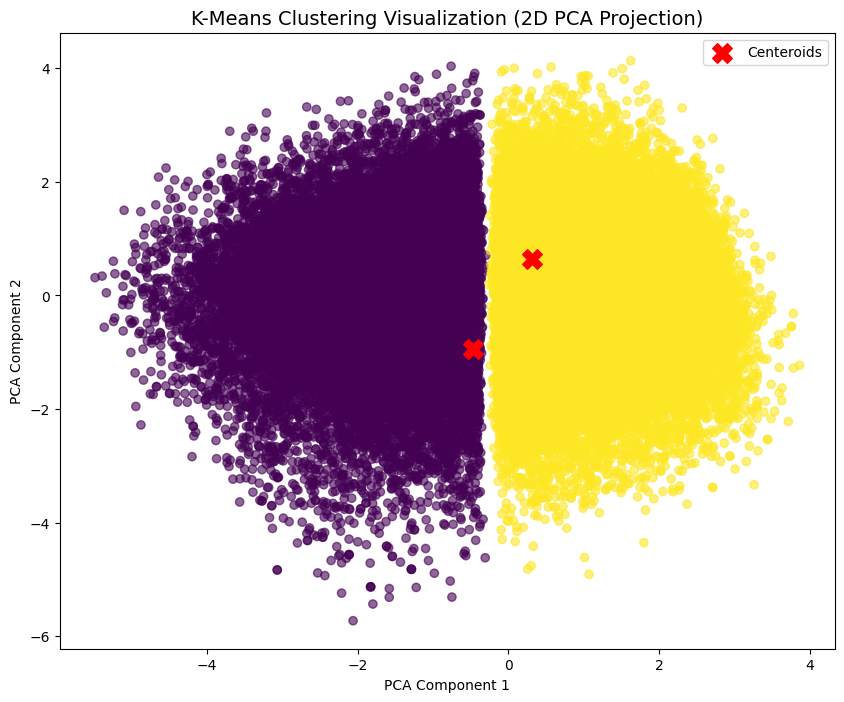

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(dataset)

plt.figure(figsize=(10,8))
plt.scatter(df_pca[:,0], df_pca[:,1], c=labels,cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering Visualization (2D PCA Projection)", fontsize=14)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=200, c='red', marker='X',label='Centeroids')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
sil_score = silhouette_score(dataset, labels)
davies_score = davies_bouldin_score(dataset, labels)
inertia = km.inertia_

print(f"KMeans Silhouette score : {sil_score:.4f}")
print(f"Kmeans davies bouldin score : {davies_score:.4f}")
print(f"Kmeans Inertia : {inertia:2f}")

KMeans Silhouette score : 0.2011
Kmeans davies bouldin score : 1.8472
Kmeans Inertia : 443524.034805
